<a href="https://colab.research.google.com/github/mvish7/PyTorch/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 The objective of the regression task is to explain and make adequate predictions based on the linear relation with an independent variable
 
 The simplest form of the linear regression equation is defined by:

Ŷ = bX + a + e
where,



Ŷ = Predicted value of Y

X = Independent variable

b = Slope coefficient based on best-fitting line

a = Y-axis intercept

e = Error term




**Model Structure**


In [0]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [0]:
x_data = Variable(torch.Tensor([[10.0], [9.0], [3.0], [2.0]]))

In [0]:
y_data = Variable(torch.Tensor([[90.0], [80.0], [50.0], [30.0]]))

In order to set up the model class, we need to initialize the model type and declare the forward pass. Since our model takes one independent variable and makes one prediction for the Ŷ variable at a time, we initialize our model with this linear layer: torch.nn.Linear(1, 1) , where the first 1 is for the input size, and the second 1 is for the output size.


---

Next is to define the forward pass function. The forward pass refers to the calculation process of the output data from the input. We simply define as below. The function takes x as its input and outputs the predicted value of Y, y_pred .

In [0]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
      
model = LinearRegression()

super():  at a high level super() gives you access to methods in a superclass from the subclass that inherits from it.
more into at https://realpython.com/python-super/

**Loss Function (Criterion)**

In [0]:
criterion = torch.nn.MSELoss(reduction='sum') 
#about MSE loss https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss

Next, we will use Stochastic Gradient Descent (SGD) optimizer for the update of hyperparameters. model.parameters() will provide the learnable parameters to the optimizer and lr=0.01 defines the learning rates for the parameter updates.

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#about optimisers https://pytorch.org/docs/stable/optim.html

**model training**

In [0]:
for epoch in range(20):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(x_data)
    
    # Compute Loss
    loss = criterion(y_pred, y_data)
    
    # Backward pass
    loss.backward()
    optimizer.step()

We first need to set our gradient to zero: optimizer.zero_grad() . This is because every time a variable is back propagated through, the gradient will be accumulated instead of being replaced.


---

Then optimizer.step() performs a parameter update based on the current gradient.


In [0]:
new_x = Variable(torch.Tensor([[45.0]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred.data[0][0])

predicted Y value:  tensor(-1.0459e+12)


In [0]:
x_data.data.numpy()

array([[10.],
       [ 9.],
       [ 3.],
       [ 2.]], dtype=float32)

In [0]:
y_data.data.numpy()

array([[90.],
       [80.],
       [50.],
       [30.]], dtype=float32)

Text(0, 0.5, 'y_data')

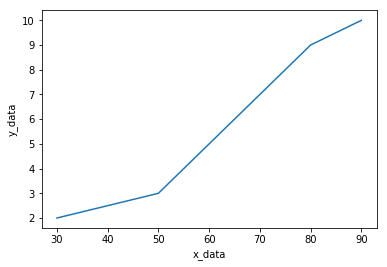

In [0]:
plt.plot(y_data.data.numpy(),x_data.data.numpy())
plt.xlabel('x_data')
plt.ylabel('y_data')

In [0]:
t=torch.as_tensor([[2,3],[4,6],[67,98],[1,90]])
a=t.data



---



**Linear regression once again-- robert alvarez tutorials**

In [0]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms
from cycler import cycler


# minor changes to plotting functions
import matplotlib.pyplot as plt
cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c


In [7]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [18]:
n=1000
x=torch.torch.ones(n,2)
x[:,0].uniform_(-1.,1)  # indexing the 1st column of the tensor as setting it's values uniformly distributed over -1 to 1
x[:5]  #printing the 1st 5 rows

tensor([[ 6.7039e-02,  1.0000e+00],
        [ 2.4402e-04,  1.0000e+00],
        [ 3.4794e-01,  1.0000e+00],
        [-9.6988e-01,  1.0000e+00],
        [ 5.5648e-01,  1.0000e+00]])

In [20]:
a = torch.tensor([3.,2]);
a

tensor([3., 2.])

In [0]:
y = x@a+torch.randn(n)/3 #creating the lable (y) for our input(x), @ is a matrix multiplication


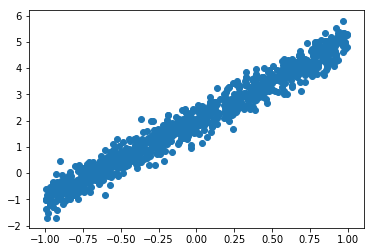

In [28]:
plt.scatter(x[:,0], y);  # plotting 1st column of x vs y

In [0]:
def mse(y, y_pred): 
    return ((y - y_pred)**2).mean()  #defining loss fun its MSE

In [0]:
a_guess = torch.tensor([-1.,1])

In [32]:
y_hat = x@a # @ is matrix multiplication
mse(y_hat, y)

tensor(0.1102)

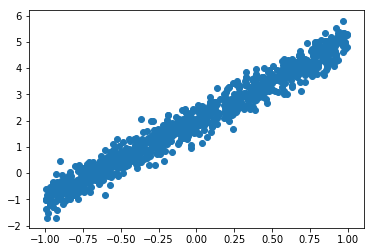

In [33]:
plt.scatter(x[:,0],y)


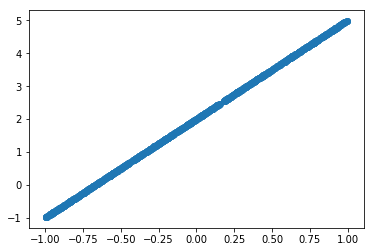

In [34]:
plt.scatter(x[:,0],y_hat);

In [35]:

a_guess = nn.Parameter(a_guess)
a_guess

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    '''
    function to update tensor using SGD
    '''
    y_hat = x@a_guess
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a_guess.sub_(lr * a_guess.grad)
        a_guess.grad.zero_()

In [44]:
lr = 1e-1
for t in range(100): 
    update()

tensor(6.5078, grad_fn=<MeanBackward0>)
tensor(1.4614, grad_fn=<MeanBackward0>)
tensor(0.4378, grad_fn=<MeanBackward0>)
tensor(0.1901, grad_fn=<MeanBackward0>)
tensor(0.1296, grad_fn=<MeanBackward0>)
tensor(0.1148, grad_fn=<MeanBackward0>)
tensor(0.1112, grad_fn=<MeanBackward0>)
tensor(0.1103, grad_fn=<MeanBackward0>)
tensor(0.1101, grad_fn=<MeanBackward0>)
tensor(0.1100, grad_fn=<MeanBackward0>)


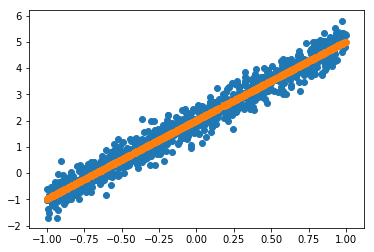

In [45]:

plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a_guess.detach()); # detach() removes gradient from `a` so it can be plotted. otherwise matplotlib gives error